# Using WPS through Jupyter Notebook

## Introduction
The Web Processing Service (WPS) allows you to analyse the data and plot the results for easy understanding. Many different types of analyses are possible. In this demonstration we use the GEOGLAM Fractional Cover Monthly data and calculate the mean value for each time position. The values for three bands (Band 1-3) will be plotted.

The purpose is to visually represent the mean values for red, green and blue bands for smaller regions instead of for the whole Australia or a state.

In [6]:
##########################################################
# Author: Arapaut V. Sivaprasad.                         #
# Dates: Created: 09/12/2019; Last Modified: 27/2/2020  #
##########################################################

from owslib.wcs import WebCoverageService
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from netCDF4 import Dataset
import numpy as np

import warnings
warnings.filterwarnings('ignore')


### Specify the URL of GSKY server and the layer name.

In [7]:
# Specify the GSKY production URL here. The layer is hard coded below.
gsky_url = 'https://gsky.nci.org.au/ows/geoglam'
wcs = WebCoverageService(gsky_url, version='1.0.0')
layer = "modis_fract_cov_monthly"


### Area covered in this notebook
<img src='nsw.png' width="256">

#### Method of plotting
Data for the 12 tiles that cover NSW are separately retrieved. Mean values for the three bands (red, green, blue) are then plotted against the time positions. There will be 6 graphs representing the 6 months of data retrieved.

The purpose is to visually represent the variations in red, green and blue bands over time. Only 6 time positions are chosen for speed, but the entire set of data (229 time positions as on 27 Feb, 2020) can be plotted.

### Available time positions in the database

In [8]:
# This block of code is for informational purpose only. It lets you see the available time positions.
# To display the available time slices in any range, specify the start and end values as m,n below
time = wcs[layer].timepositions
n_times = len(time)
m = 0
n = n_times

# Unlike in the case of datacube, where a time range can be specified, GSKY requires a specific date.
t = n_times-1

# Uncomment the line below to see all time positions.
# print ("Total of", n_times,'timepositions:\n\n', time[m:n])
# print(wcs[layer].timepositions[t])

In [9]:
# The list of tiles that cover the NSW which is bounded by '141.02,-36.88,153.98,-27.16'
# Some parts of QLD and VIC are included in the above BBox.
# Rows of tiles span left to right and column are bottom to top.
tiles_list = [
'141.02,-36.88,144.26,-33.64',
'144.26,-36.88,147.50,-33.64',
'147.50,-36.88,150.74,-33.64',
'150.74,-36.88,153.98,-33.64',

'141.02,-33.64,144.26,-30.40',
'144.26,-33.64,147.50,-30.40',
'147.50,-33.64,150.74,-30.40',
'150.74,-33.64,153.98,-30.40',

'141.02,-30.40,144.26,-27.16',
'144.26,-30.40,147.50,-27.16',
'147.50,-30.40,150.74,-27.16',
'150.74,-30.40,153.98,-27.16'
]
# tiles_list

This step normally takes 7.5 minute(s). It could be longer!
............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

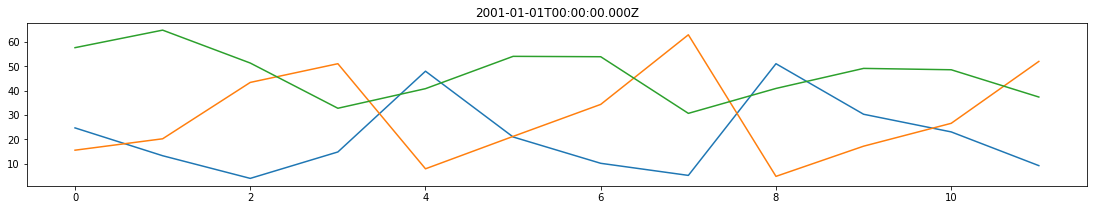

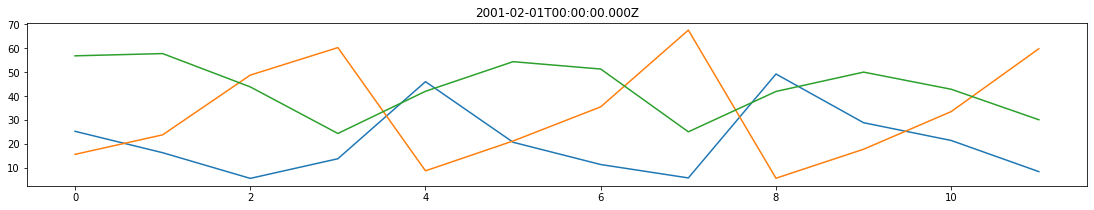

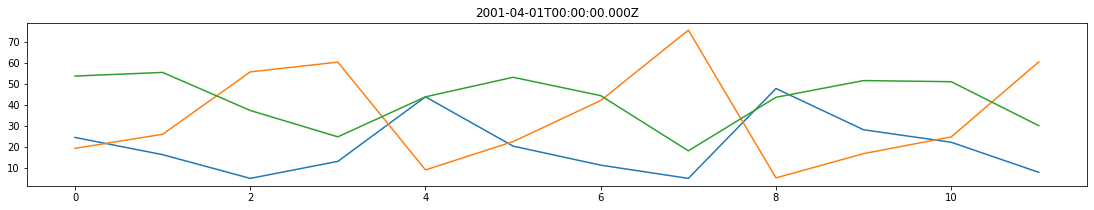

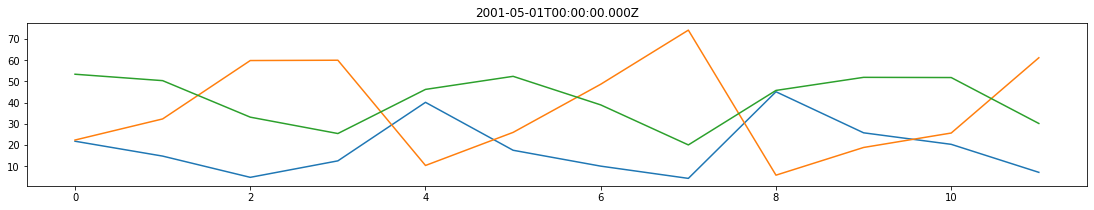

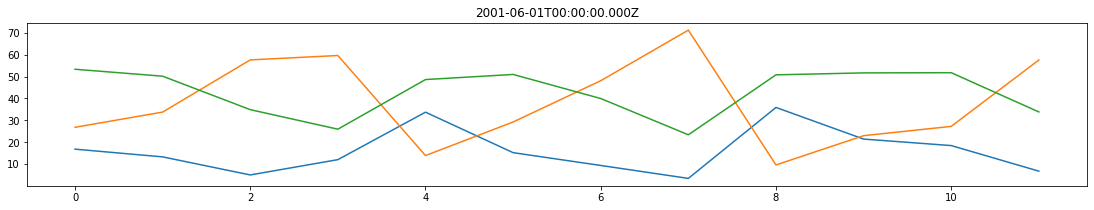

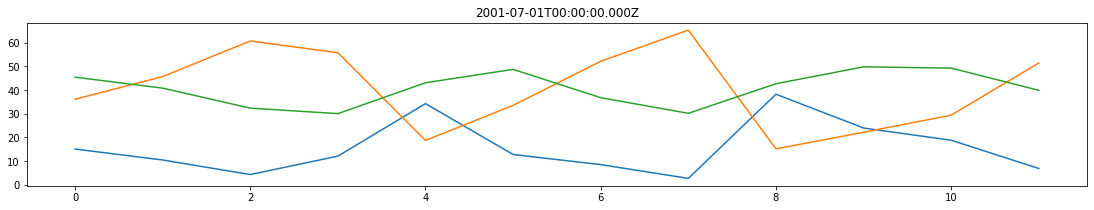

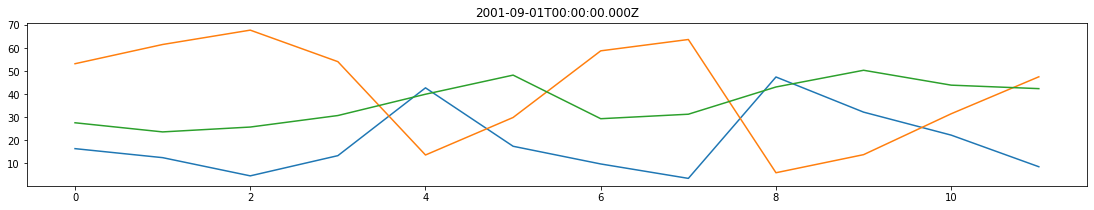

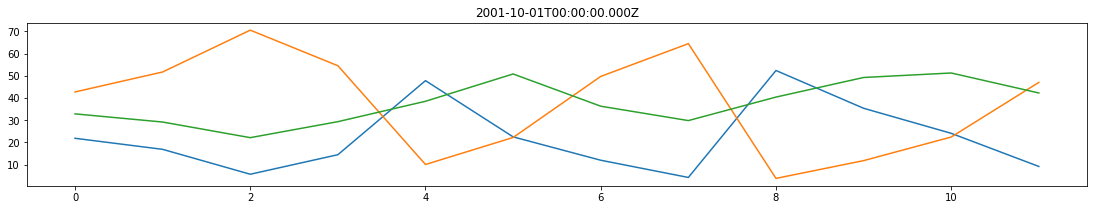

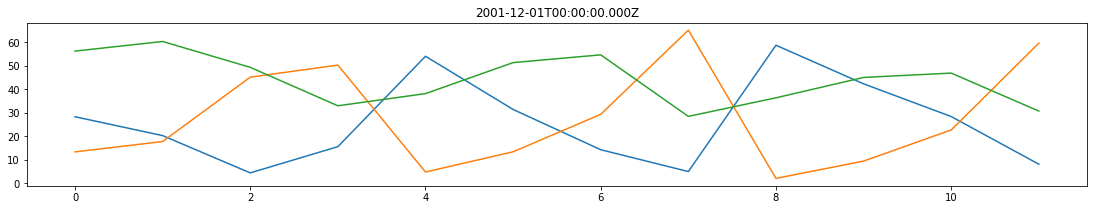

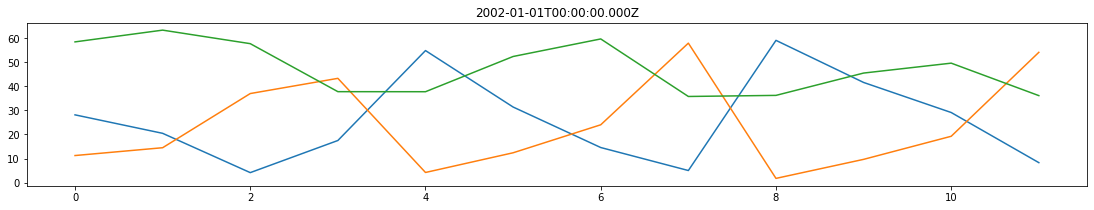

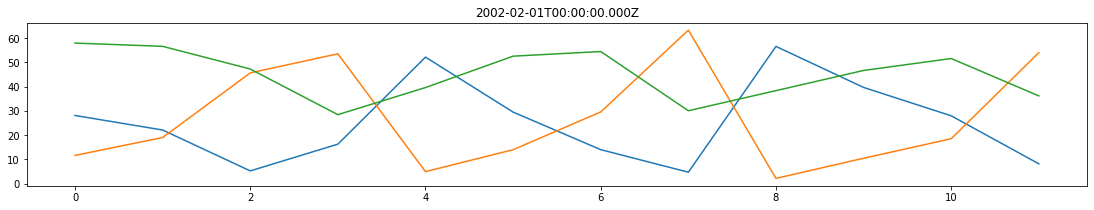

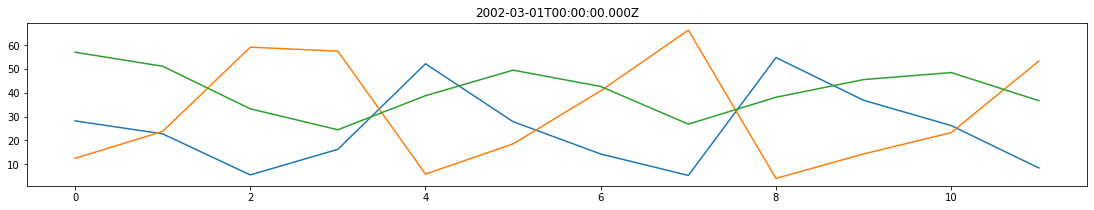

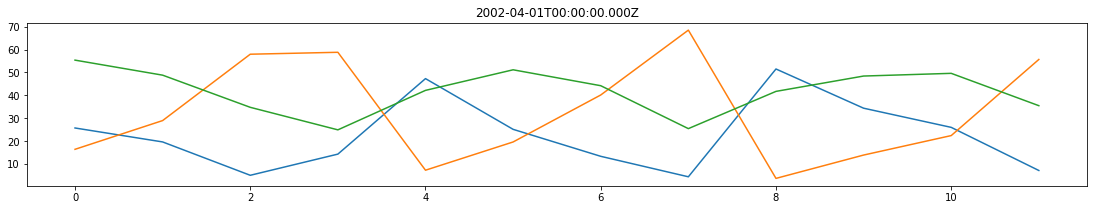

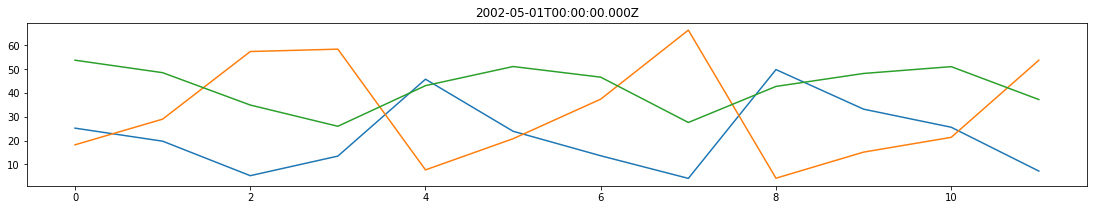

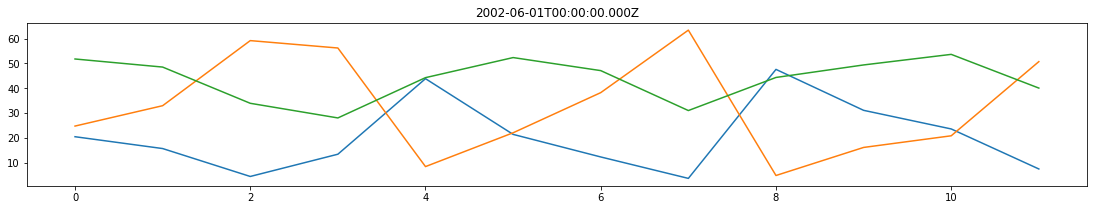

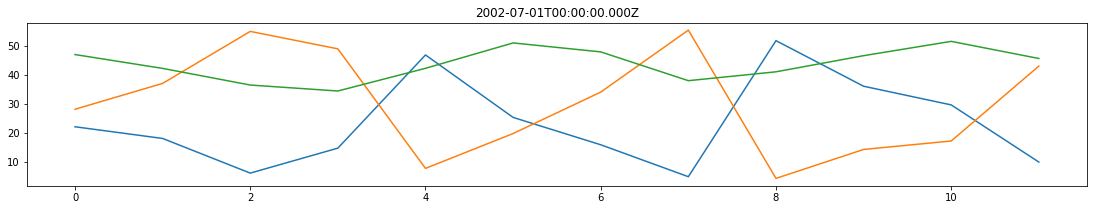

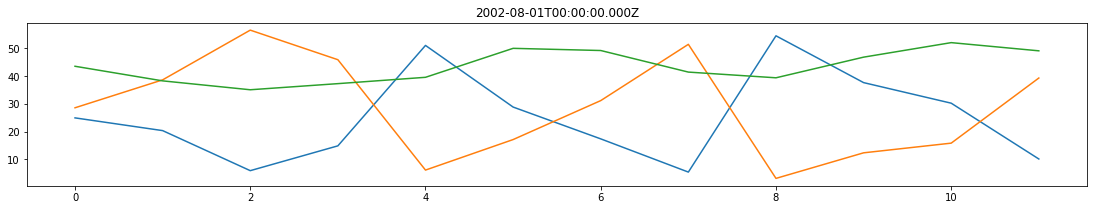

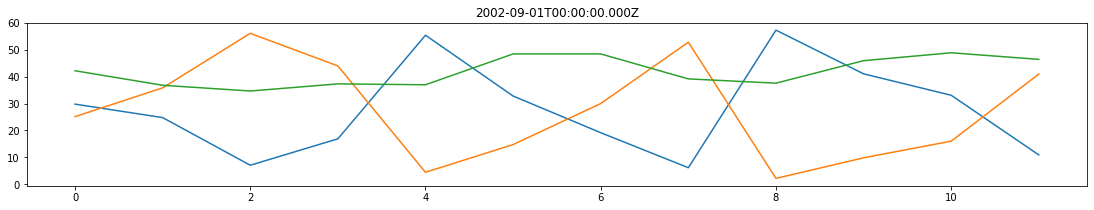

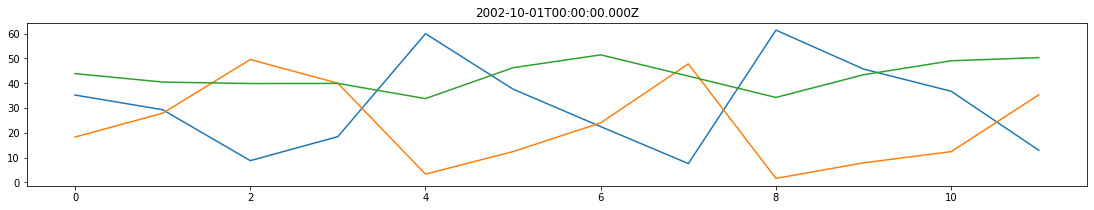

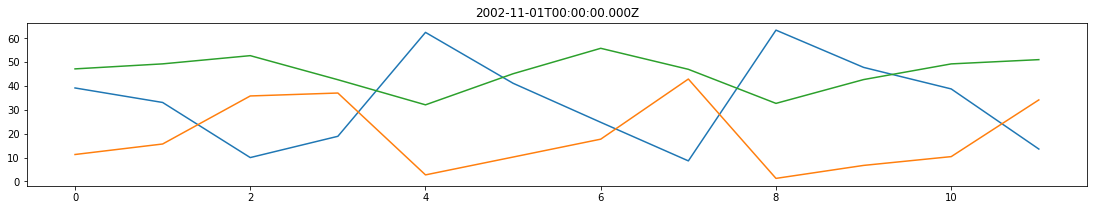

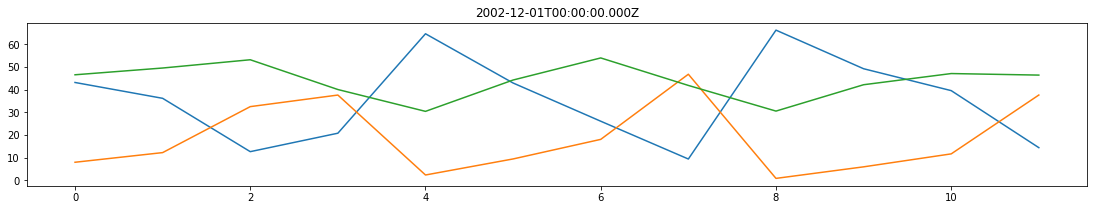

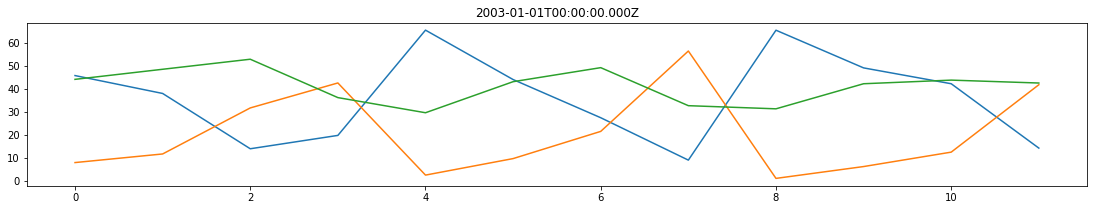

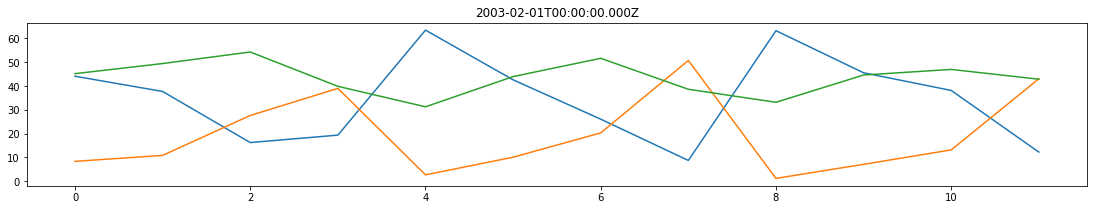

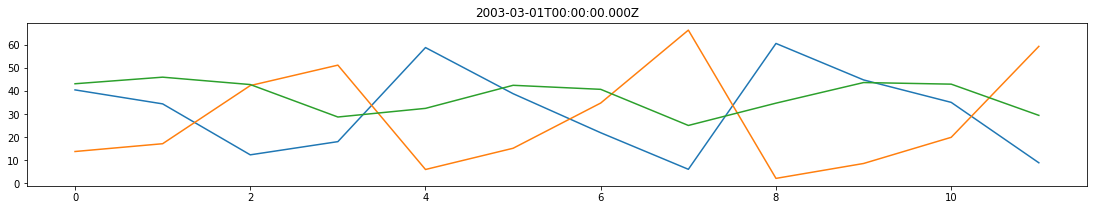

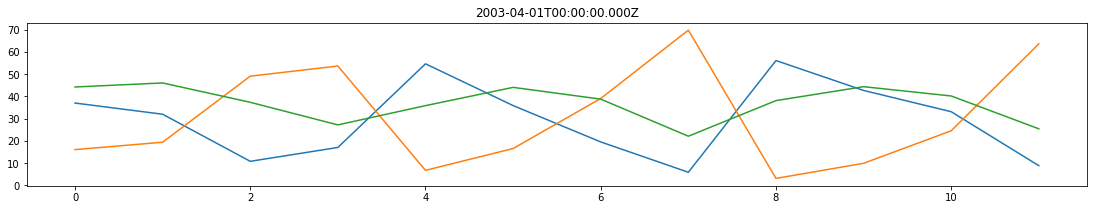

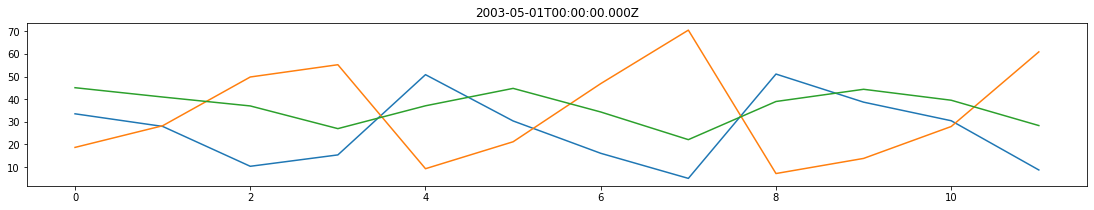

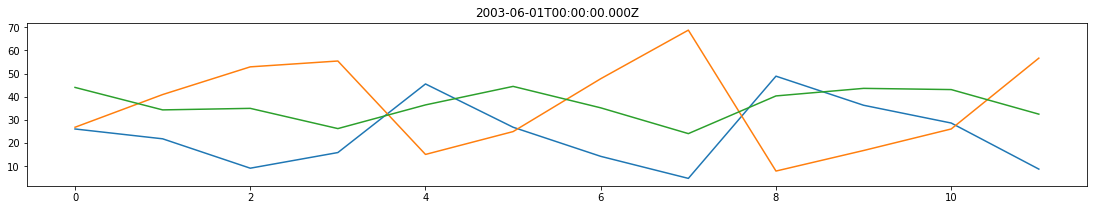

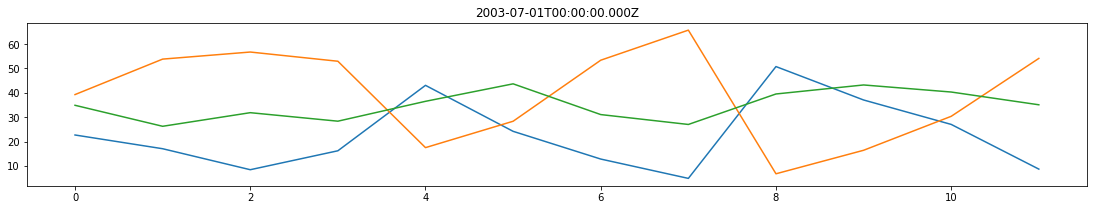

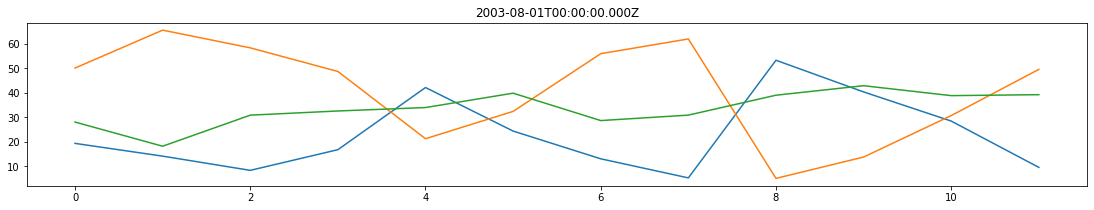

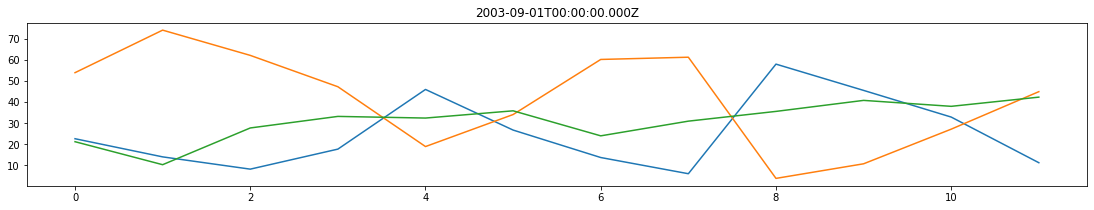

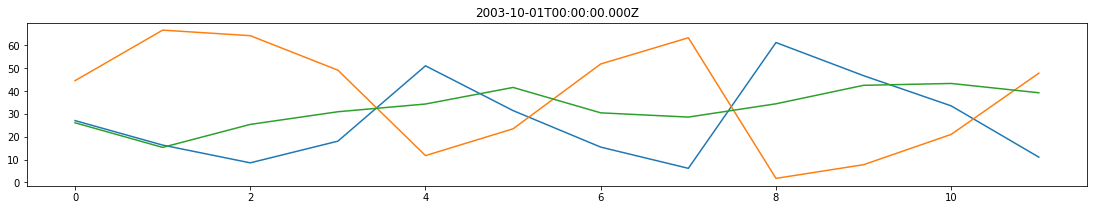

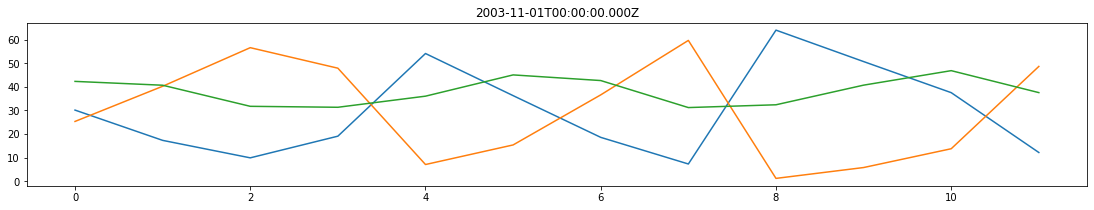

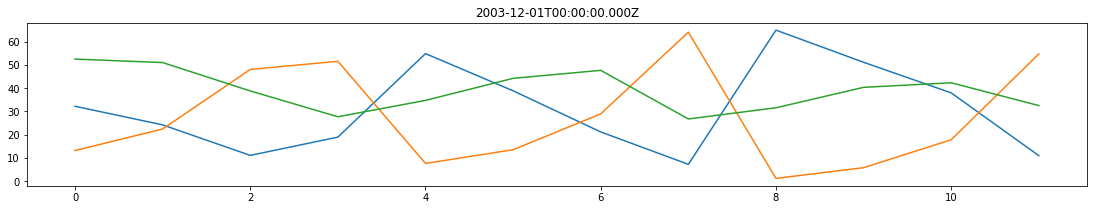

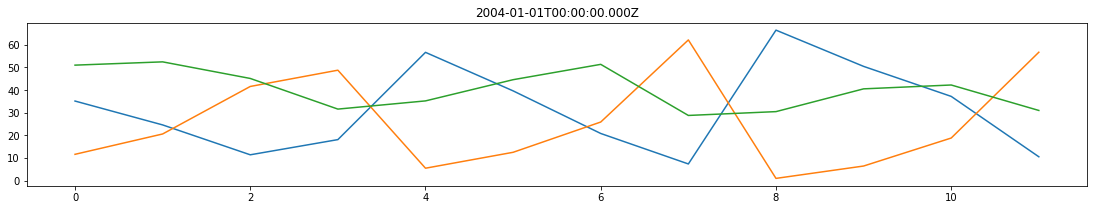

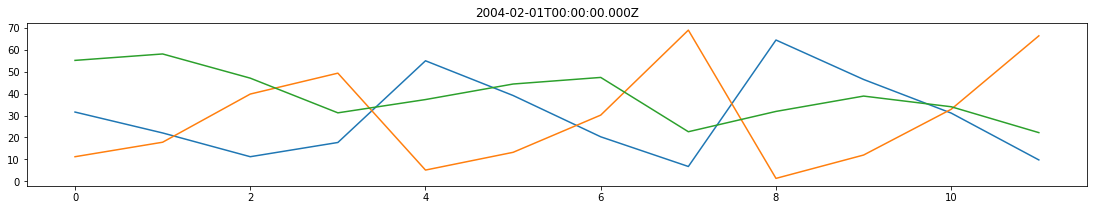

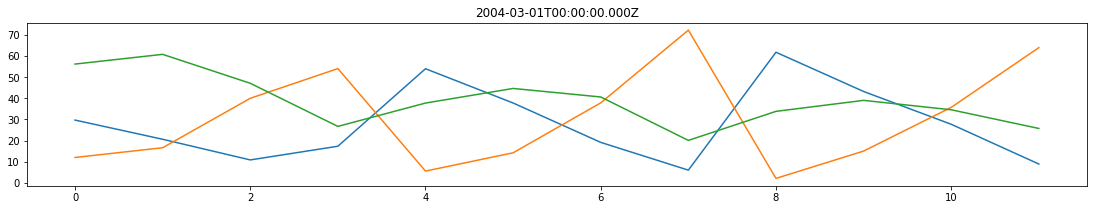

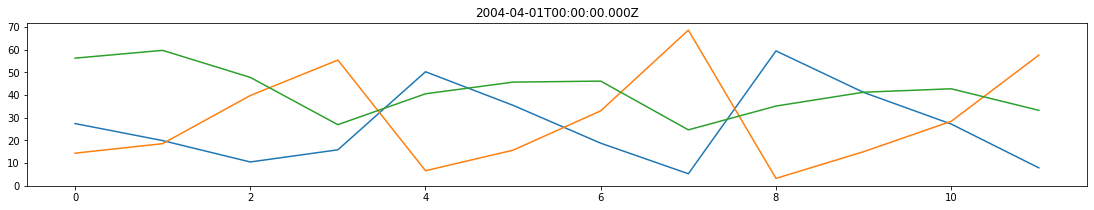

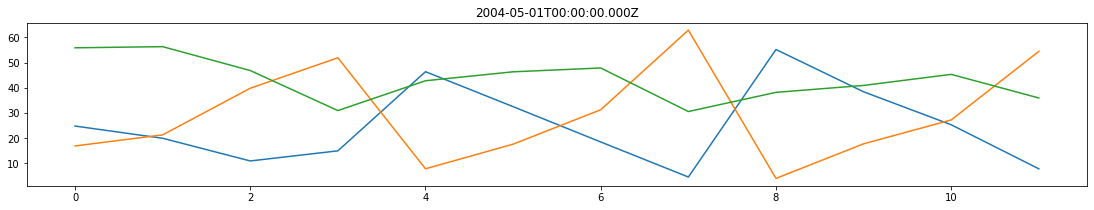

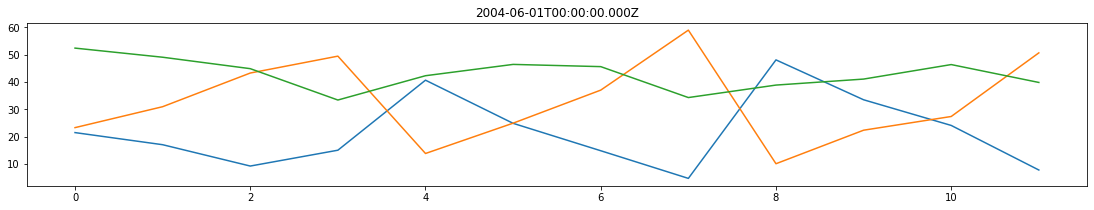

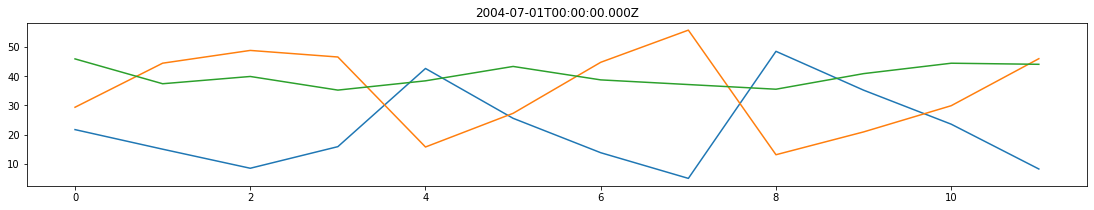

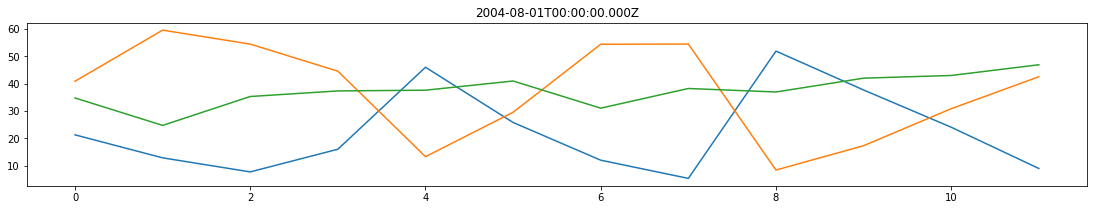

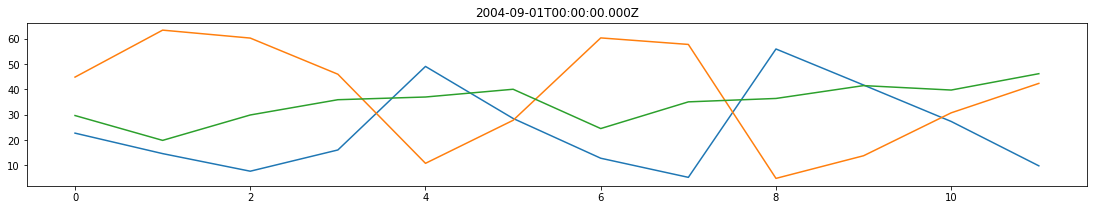

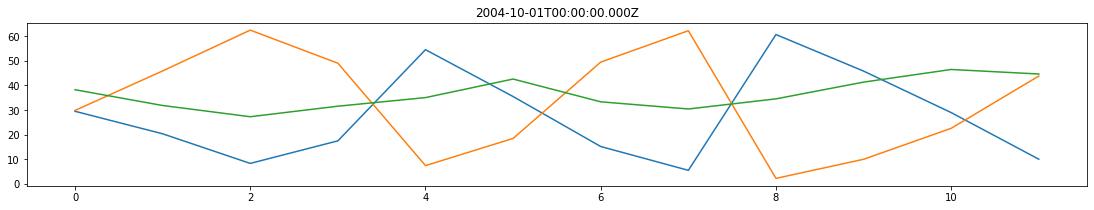

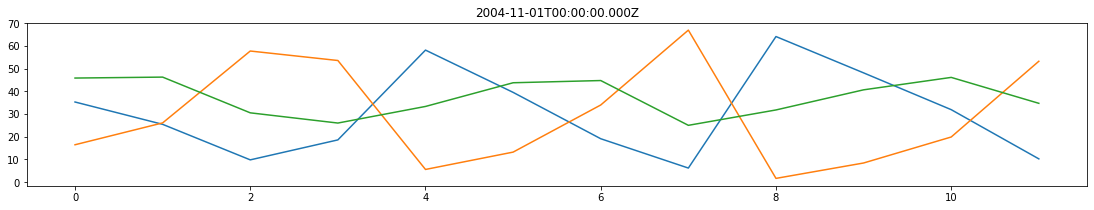

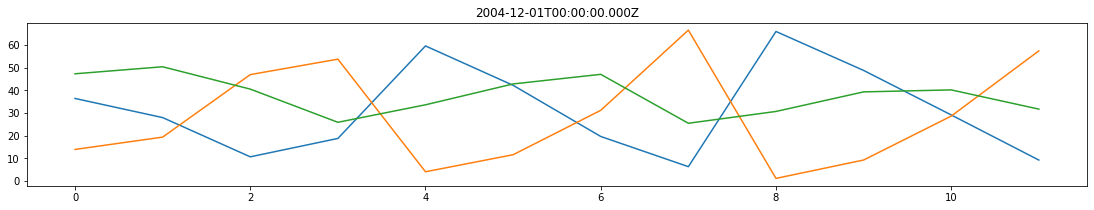

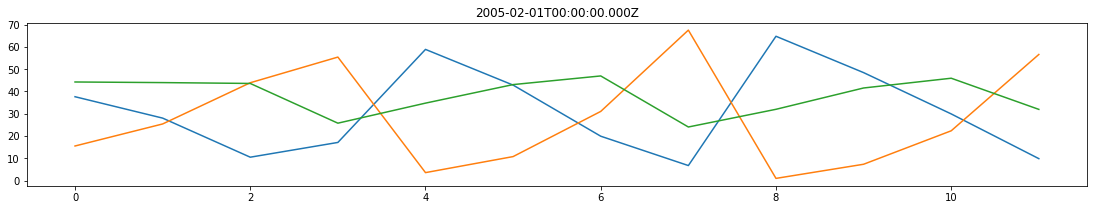

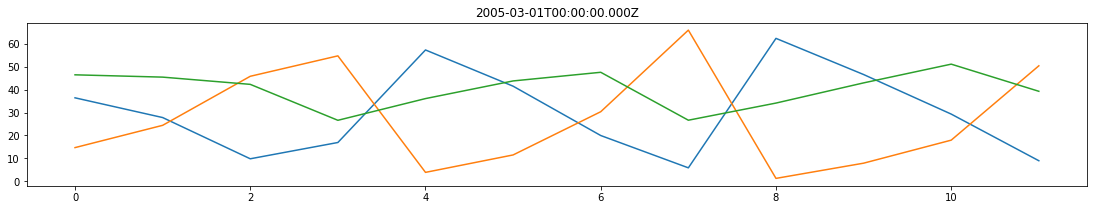

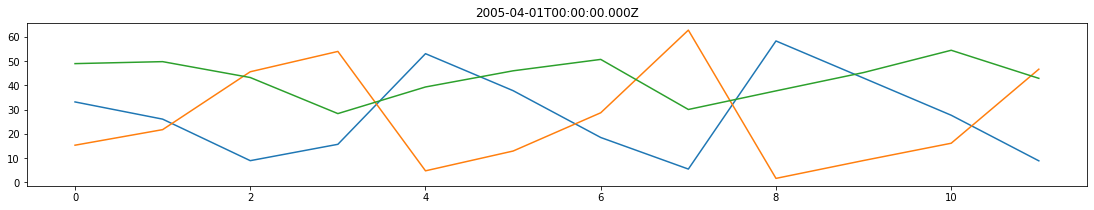

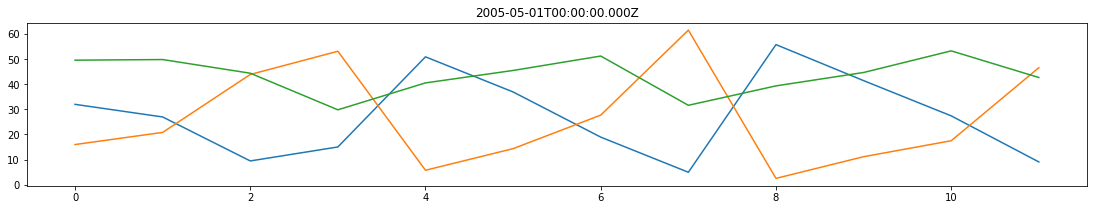

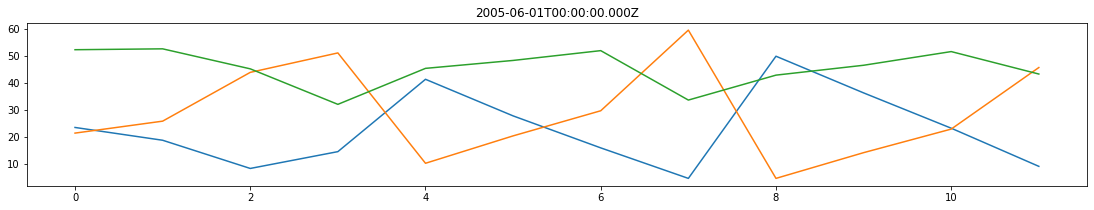

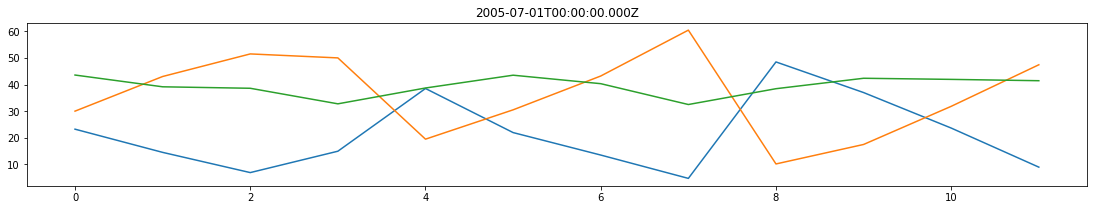

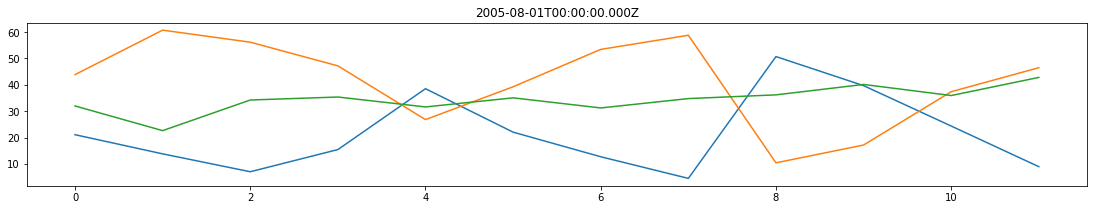

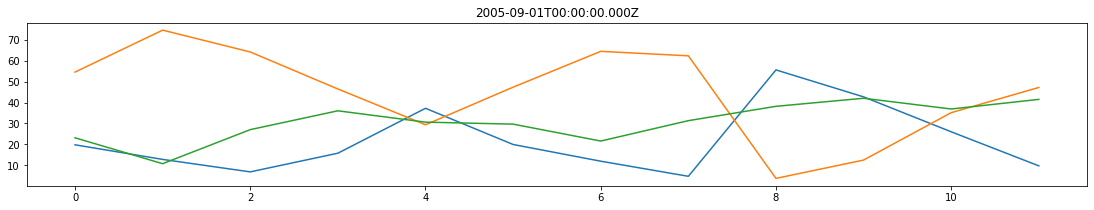

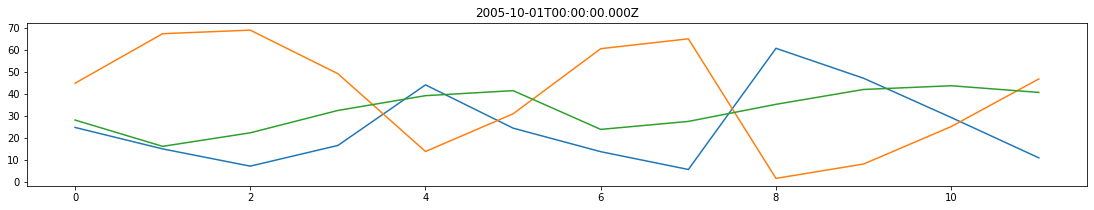

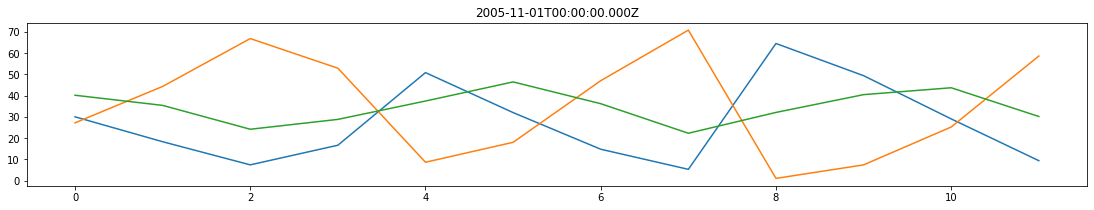

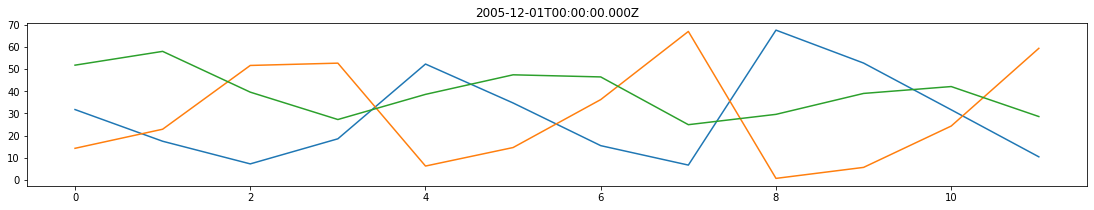

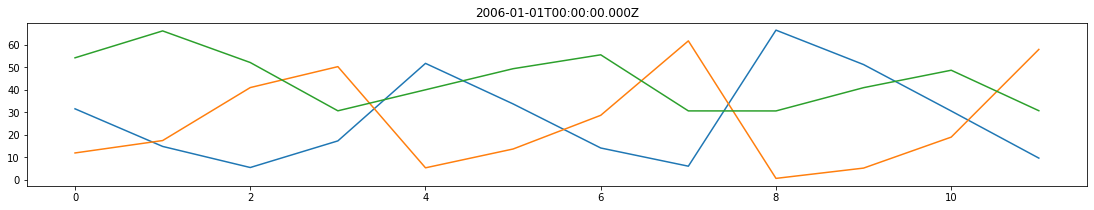

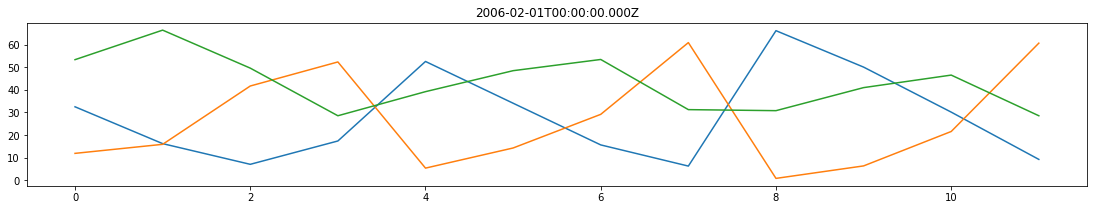

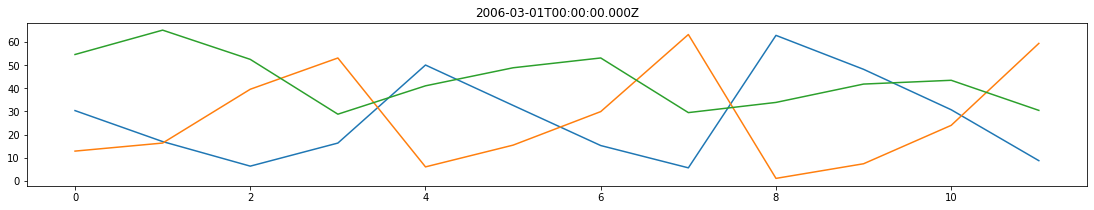

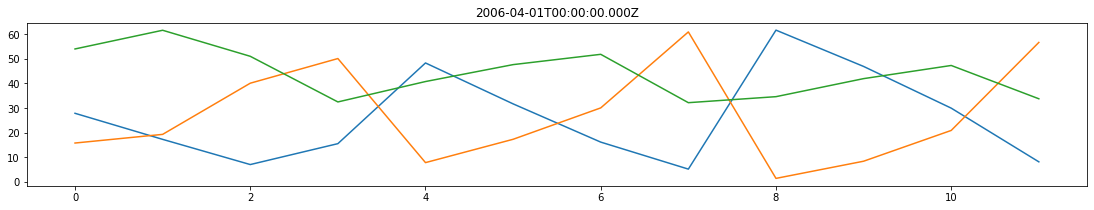

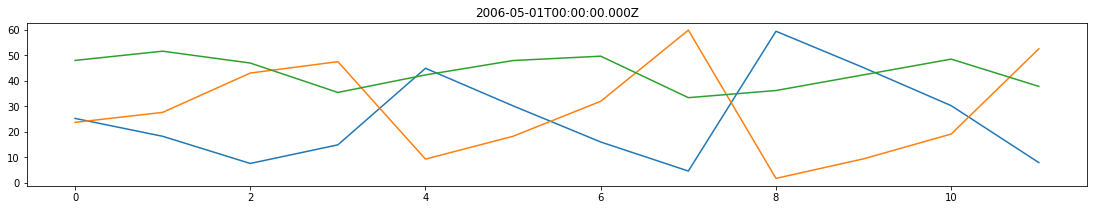

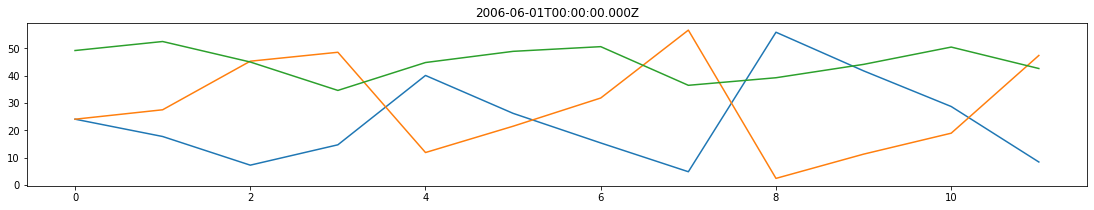

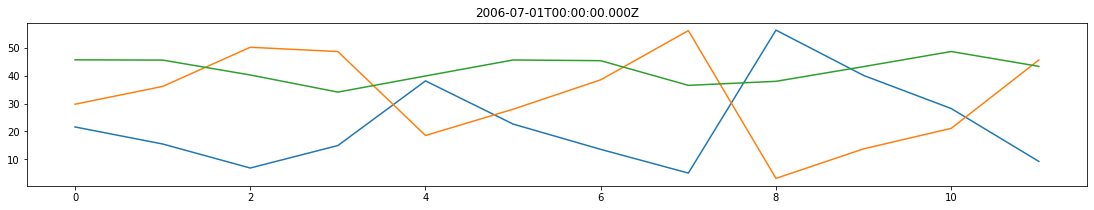

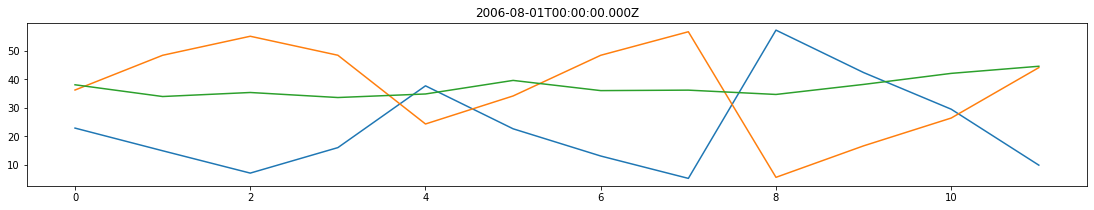

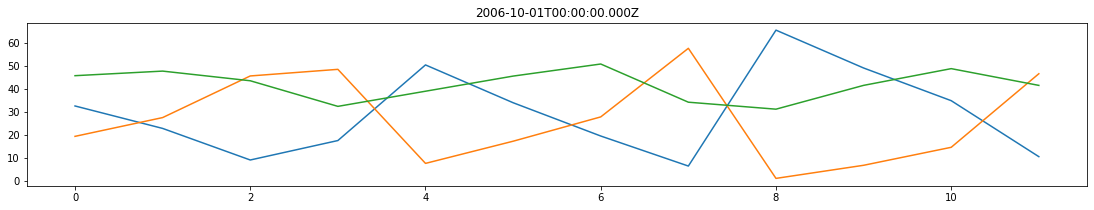

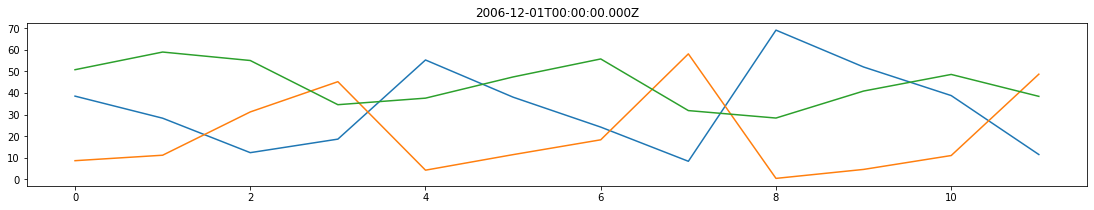

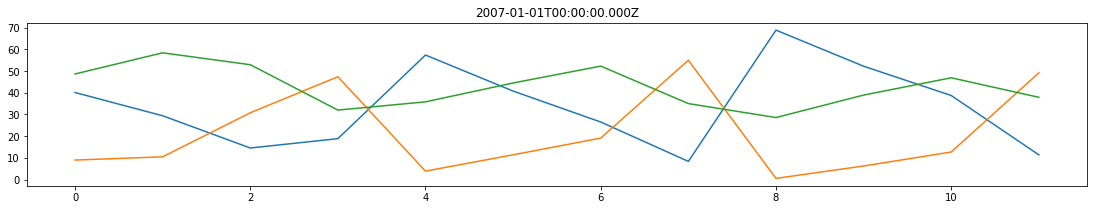

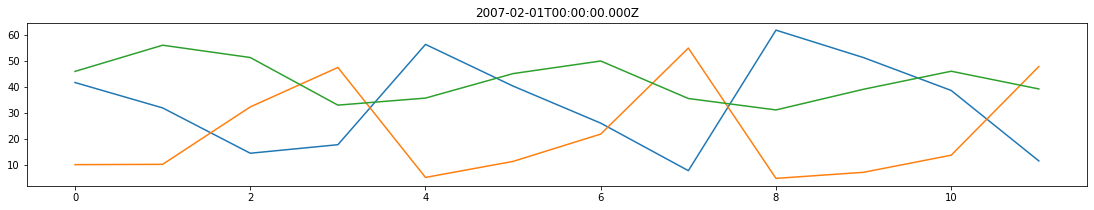

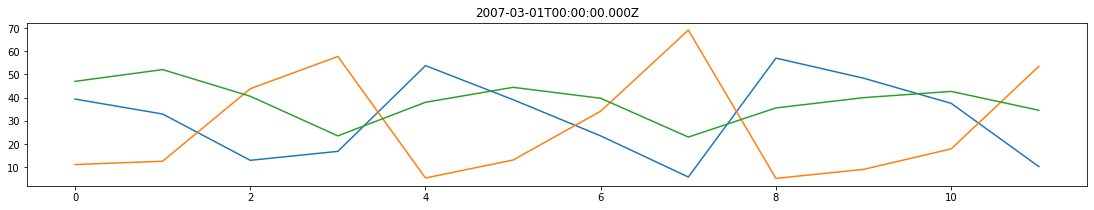

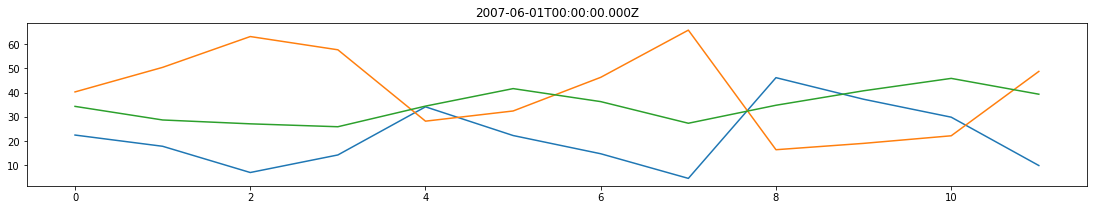

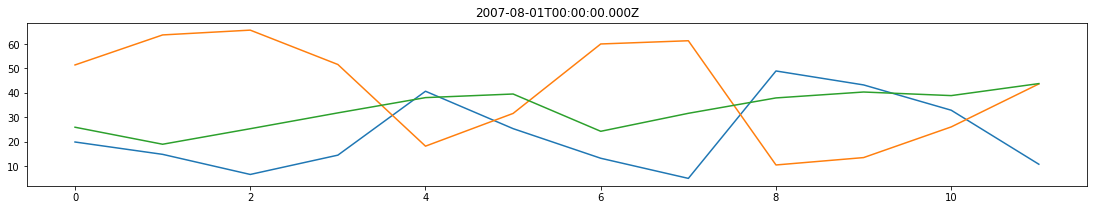

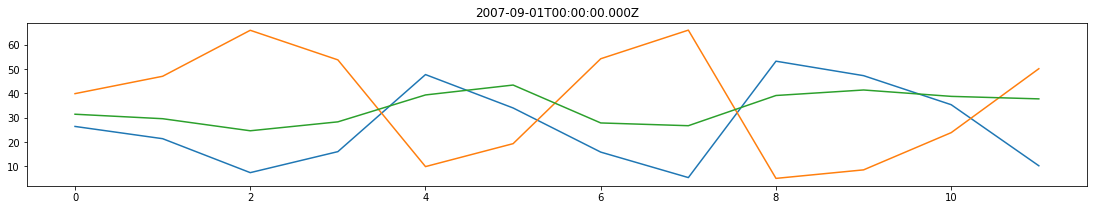

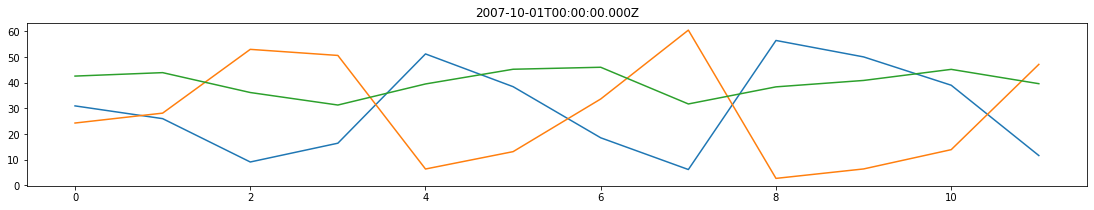

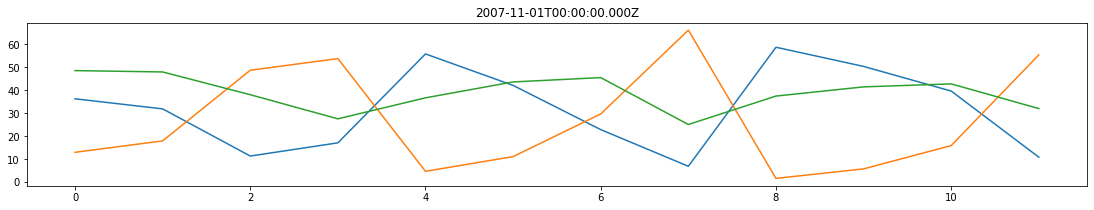

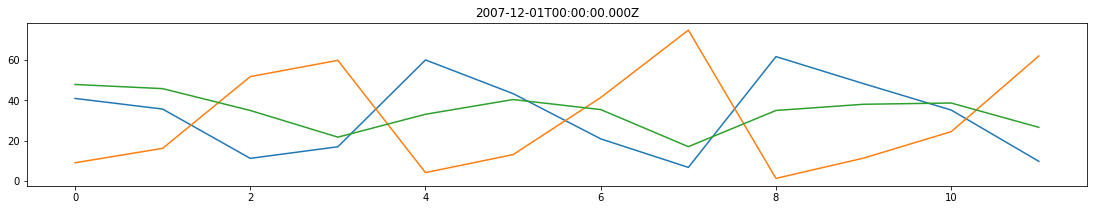

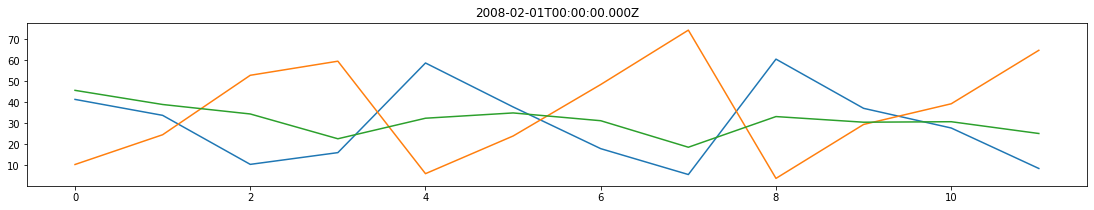

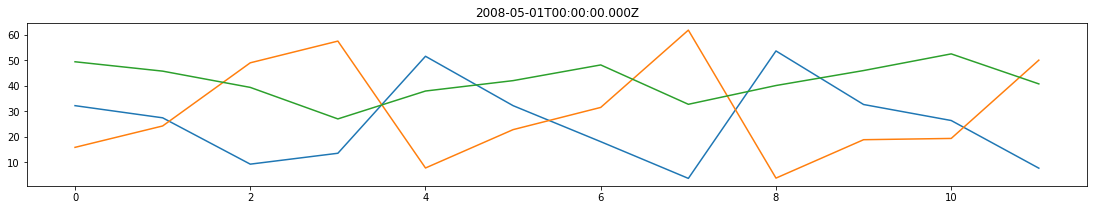

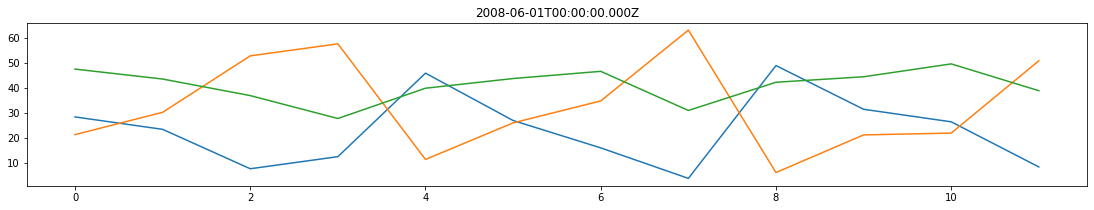

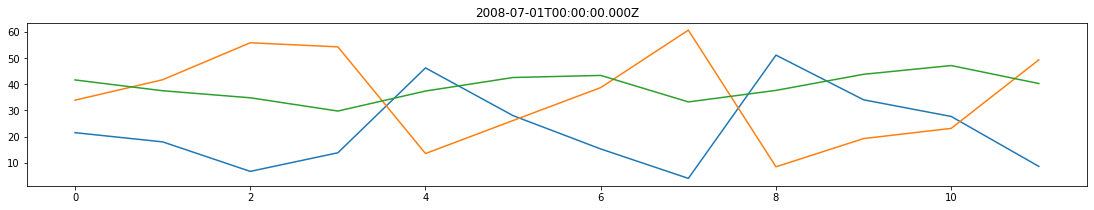

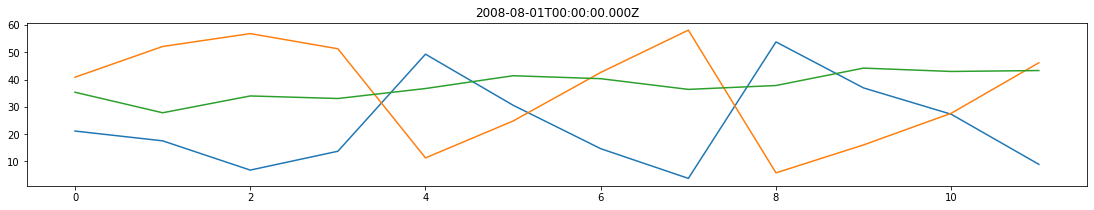

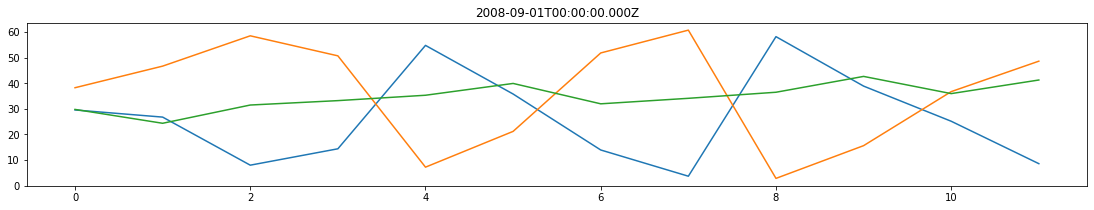

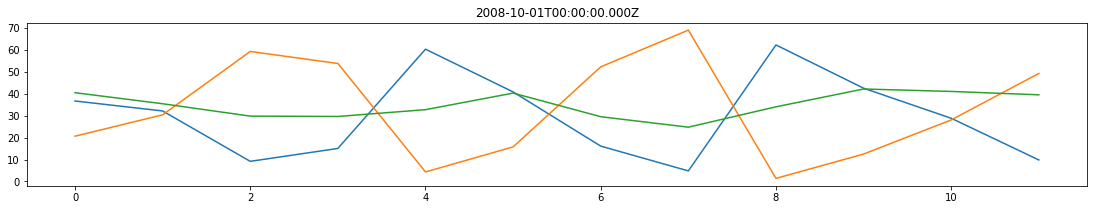

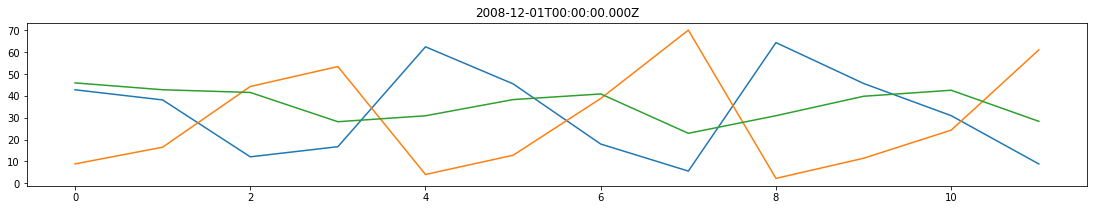

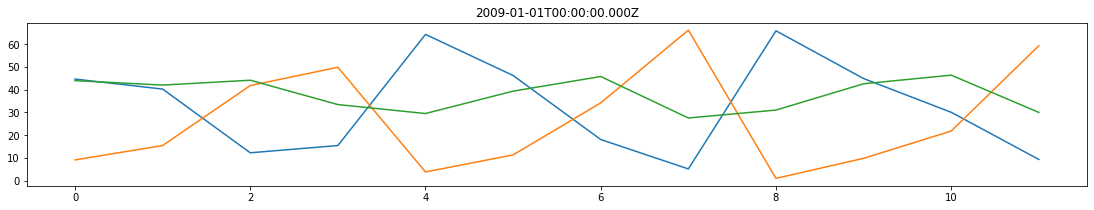

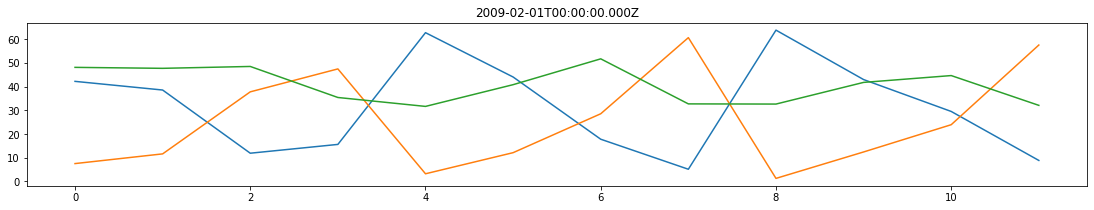

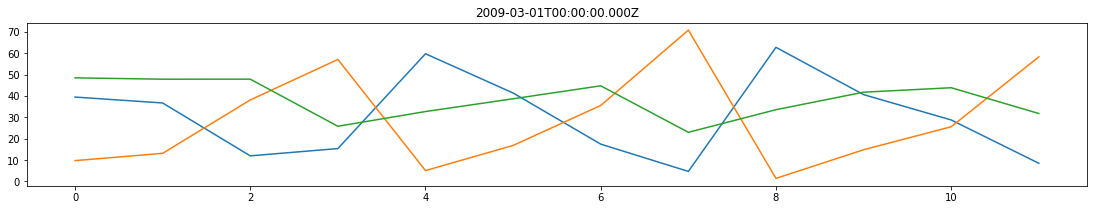

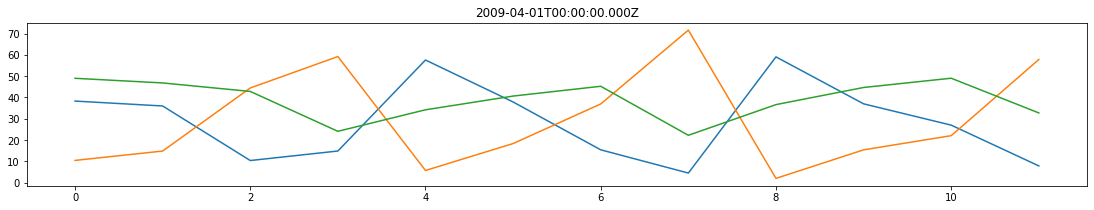

Finished!


In [10]:
# Specify the range of timepositions
lt = len(wcs[layer].timepositions) # Total number of timepositions
s = 0  # Start of timepositions
e = 100 # End of timepositions. Change it to 'lt' to get the latest times
# nt = e-s # Range of time positions
tm = (e-s)*len(tiles_list)*0.375/60 # Total time in minutes to process (approx.)
a = np.empty((e-s,len(tiles_list),3),float)
j = -1
print("This step normally takes {} minute(s). It could be longer!".format(round(tm, 1)))

# Retrieve the data from GSKY server
for i in range(s, e):
    timeposition = wcs[layer].timepositions[i]
    j += 1
    for k in range(len(tiles_list)):
        bbox = [tiles_list[k]]
        output = wcs.getCoverage(identifier=layer, Styles='',
             time=[wcs[layer].timepositions[i]],
             bbox=bbox,format='NetCDF',
             crs='EPSG:4326', width=256, height=256)
        nc = Dataset('dtemp.nc','r',diskless=True,persist=False, memory=output.read())
        red = nc.variables['Band1'][:]
        green = nc.variables['Band2'][:]
        blue = nc.variables['Band3'][:]
        print(".", end='')
        # Calculate the mean values for each tile and store in the numpy array 
        rm = red.mean() # mean
        a[j, k, 0] = rm
        gm = green.mean() # mean
        a[j, k, 1] = gm
        bm = blue.mean() # mean
        a[j, k, 2] = bm
print("") 

# Plot the data
j = -1
for i in range(s, e):
    j += 1
    timeposition = wcs[layer].timepositions[i]
    plt.figure(figsize=(19, 3))
    title = str(timeposition)
    plt.title(title)
    ax = plt.subplot(111)
    ax.plot(a[j])
    plt.show()      
print("Finished!")    


## ______End of Notebook_______